In [9]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import gdown,zipfile,os
url='https://drive.google.com/u/0/uc?id=1RYBDZEEufMRvYB_vtXhG0WXMwqm0XpLR&export=download'
path='NOUMAN_DATA/COVID_DATA'
download_path=f'{path}/Covid Dataset.zip'
if not os.path.exists(path):
  os.makedirs(path)
gdown.download(url,download_path,quiet=False)

In [ ]:
with zipfile.ZipFile(download_path,'r') as ziphandler:
  ziphandler.extractall(path)

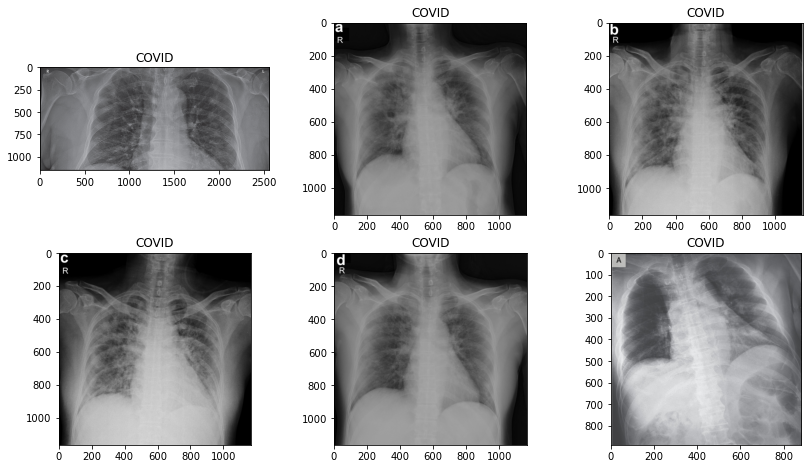

In [48]:
way="NOUMAN_DATA/COVID_DATA/Covid Dataset/mini-dataset/dataset/covid"
plt.rcParams["figure.figsize"]=(14,12)
c=0
for k,i in enumerate(os.listdir(way)):
    if c==6:
        break
    plt.subplot(3,3,k+1)
    plt.imshow(Image.open(f'{way}/{i}'))
    plt.title("COVID")
    c+=1
plt.show()

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
way_1="NOUMAN_DATA/COVID_DATA/Covid Dataset/datasets/datasets/train/positive"
way_2='NOUMAN_DATA/COVID_DATA/Covid Dataset/datasets/datasets/train/negative'
c=0
def RESET(way):
    try:
        for i in os.listdir(way):
            overall=f'{way}/{i}'
            choose=overall.split(".")
            if len(choose)>3:
                os.rename(overall,f'{choose[0]+choose[1]}.{choose[3]}')
    except:
        pass

In [20]:
RESET(way_1)

In [21]:
RESET(way_2)

In [22]:
POSITIVE_IMAGES,NEGATIVE_IMAGES=[],[]
positive_label,negative_label=[],[]

In [23]:
def GENERATE_DATA(way,label):
    store=[]
    for image_name in os.listdir(way):
        image=cv2.imread(f'{way}/{image_name}')
        image=cv2.resize(image,(416,416))
        store.append((image,label))
    return store

positive is 0 else 1

In [24]:
positive_data=GENERATE_DATA(way_1,0)
negative_data=GENERATE_DATA(way_2,1)

In [25]:
DATA=positive_data+negative_data

In [26]:
import random
random.shuffle(DATA)

In [27]:
IMAGES,label=[],[]
for i in range(len(DATA)):
    IMAGES.append(DATA[i][0])
    label.append(DATA[i][1])

In [28]:
label[:5]

[1, 1, 1, 1, 1]

In [29]:
ARRAY_IMAGES=np.array(IMAGES)
label=np.array(label)

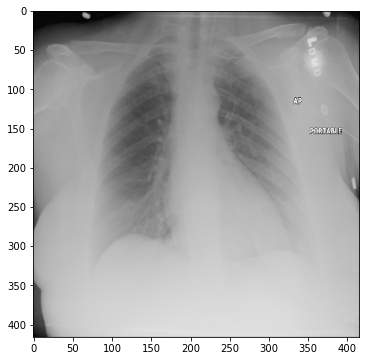

In [30]:
plt.rcParams["figure.figsize"]=(8,6)
plt.imshow(ARRAY_IMAGES[1])

In [31]:
ARRAY_IMAGES.shape

(676, 416, 416, 3)

In [32]:
from sklearn.model_selection import train_test_split
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(ARRAY_IMAGES,label,test_size=0.2)

  1%|          | 2.62M/463M [04:15<12:27:04, 10.3kB/s]


In [33]:
X_TRAIN.shape,X_TEST.shape,Y_TRAIN.shape,Y_TEST.shape

((540, 416, 416, 3), (136, 416, 416, 3), (540,), (136,))

In [34]:
import pickle

In [36]:
pickle.dump(X_TRAIN,open('Cleaned_data/X_TRAIN.pkl','wb'))
pickle.dump(X_TEST,open('Cleaned_data/X_TEST.pkl','wb'))
pickle.dump(Y_TRAIN,open('Cleaned_data/Y_TRAIN.pkl','wb'))
pickle.dump(Y_TEST,open('Cleaned_data/Y_TEST.pkl','wb'))

In [37]:
# from google.colab import drive
# drive.mount('/content/drive')

In [39]:
x_train=pickle.load(open('Cleaned_data/X_TRAIN.pkl','rb'))
x_test=pickle.load(open('Cleaned_data/X_TEST.pkl','rb'))
y_train=pickle.load(open('Cleaned_data/Y_TRAIN.pkl','rb'))
y_test=pickle.load(open('Cleaned_data/Y_TEST.pkl','rb'))

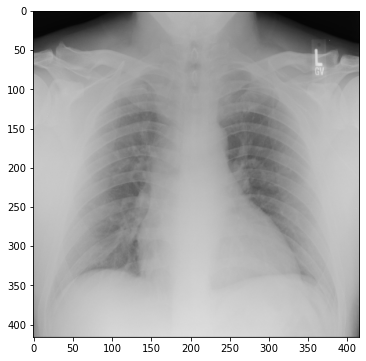

In [42]:
plt.imshow(x_train[0])

In [41]:
import cv2

In [43]:
X_TRAIN,X_TEST=[],[]
for train_image in x_train:
    X_TRAIN.append(cv2.resize(train_image,(128,128)))
for test_image in x_test:
    X_TEST.append(cv2.resize(test_image,(128,128)))

In [44]:
X_TRAIN=np.array(X_TRAIN)
X_TEST=np.array(X_TEST)

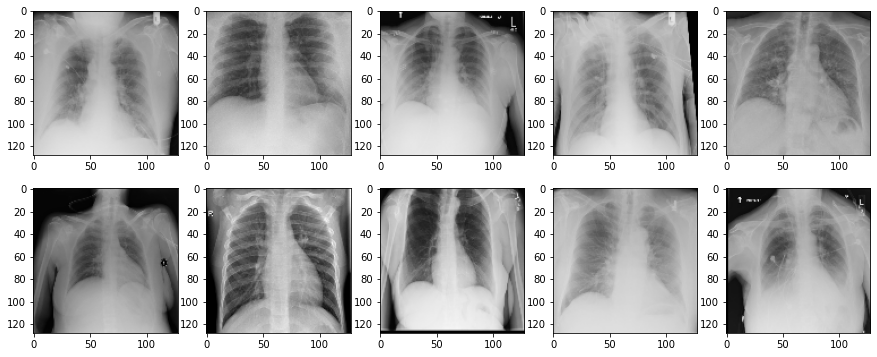

In [45]:
plt.rcParams['figure.figsize']=(15,6)
for i in range(6):
    try:
        plt.subplot(2,5,i)
        plt.imshow(X_TRAIN[i])
        plt.subplot(2,5,i+5)
        plt.imshow(X_TRAIN[i+100])
    except:
        pass
plt.show()

In [46]:
import tensorflow as tf
from tensorflow import keras

In [49]:
Chest_XRAY_CNN=keras.models.Sequential([
                             keras.layers.Input(shape=(128,128,3)),
                             keras.layers.Conv2D(32,kernel_size=(7,7), strides=(2, 2),padding='same'),
                             keras.layers.MaxPooling2D((2,2),strides=2),
                             keras.layers.Conv2D(16,kernel_size=(5,5), strides=(2, 2),padding='same'),
                             keras.layers.MaxPooling2D((2,2),strides=2),
                             keras.layers.Conv2D(8,kernel_size=(3,3), strides=(2, 2),padding='same'),
                             keras.layers.MaxPooling2D((2,2),strides=2),
                             keras.layers.Flatten(),

                             keras.layers.Dense(64,activation='relu'),
                             keras.layers.Dense(32,activation='relu'),
                             keras.layers.Dense(16,activation='relu'),
                             keras.layers.Dense(1,activation='sigmoid')
])
Chest_XRAY_CNN.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['Accuracy'])
CNN_HIST=Chest_XRAY_CNN.fit(X_TRAIN,y_train,epochs=20)

Epoch 1/20
17/17 [==============================] - 2s 63ms/step - loss: 2.9656 - Accuracy: 0.7185
Epoch 2/20
17/17 [==============================] - 1s 56ms/step - loss: 0.4321 - Accuracy: 0.8130
Epoch 3/20
17/17 [==============================] - 1s 58ms/step - loss: 0.3977 - Accuracy: 0.8111
Epoch 4/20
17/17 [==============================] - 1s 58ms/step - loss: 0.3150 - Accuracy: 0.8444
Epoch 5/20
17/17 [==============================] - 1s 58ms/step - loss: 0.2648 - Accuracy: 0.8907
Epoch 6/20
17/17 [==============================] - 1s 57ms/step - loss: 0.2364 - Accuracy: 0.9204
Epoch 7/20
17/17 [==============================] - 1s 56ms/step - loss: 0.2106 - Accuracy: 0.9167
Epoch 8/20
17/17 [==============================] - 1s 57ms/step - loss: 0.1999 - Accuracy: 0.9148
Epoch 9/20
17/17 [==============================] - 1s 58ms/step - loss: 0.1793 - Accuracy: 0.9278
Epoch 10/20
17/17 [==============================] - 1s 61ms/step - loss: 0.1476 - Accuracy: 0.9389
Epoch 11/

(0.0, 1.0)

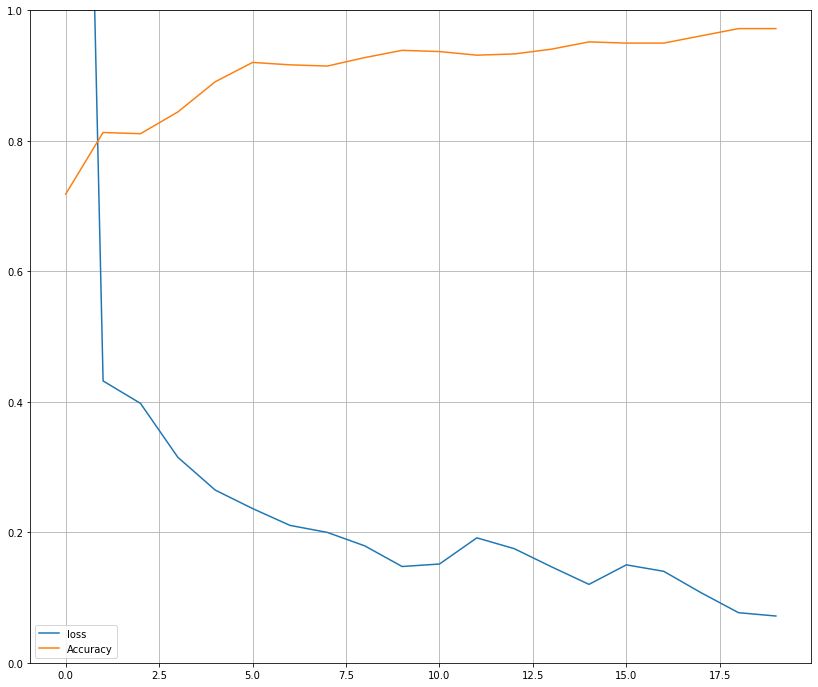

In [50]:
pd.DataFrame(CNN_HIST.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)

In [51]:
Chest_XRAY_CNN.evaluate(X_TEST,y_test)

5/5 [==============================] - 0s 17ms/step - loss: 0.1142 - Accuracy: 0.9485


[0.11417129635810852, 0.9485294222831726]

In [52]:
from tensorflow.python.ops.gen_array_ops import shape
CNN=keras.models.Sequential([
                             keras.layers.Input(shape=(128,128,3)),

                             keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
                             keras.layers.MaxPooling2D(2,2),

                             keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
                             keras.layers.MaxPooling2D(2,2),     

                             keras.layers.Flatten(),

                             keras.layers.Dense(100,activation="relu"),
                             keras.layers.Dense(50,activation="relu"),
                            
                             keras.layers.Dense(1,activation="sigmoid")
])
CNN.compile(optimizer='Adam',loss='binary_crossentropy',metrics="Accuracy")
hist=CNN.fit(X_TRAIN,y_train,epochs=10)

Epoch 1/10
17/17 [==============================] - 5s 283ms/step - loss: 32.2569 - Accuracy: 0.7241
Epoch 2/10
17/17 [==============================] - 5s 267ms/step - loss: 0.1794 - Accuracy: 0.9352
Epoch 3/10
17/17 [==============================] - 5s 266ms/step - loss: 0.1134 - Accuracy: 0.9611
Epoch 4/10
17/17 [==============================] - 5s 320ms/step - loss: 0.0785 - Accuracy: 0.9722
Epoch 5/10
17/17 [==============================] - 6s 345ms/step - loss: 0.0502 - Accuracy: 0.9852
Epoch 6/10
17/17 [==============================] - 7s 383ms/step - loss: 0.0336 - Accuracy: 0.9907
Epoch 7/10
17/17 [==============================] - 6s 364ms/step - loss: 0.0318 - Accuracy: 0.9907
Epoch 8/10
17/17 [==============================] - 7s 431ms/step - loss: 0.0325 - Accuracy: 0.9889
Epoch 9/10
17/17 [==============================] - 7s 382ms/step - loss: 0.0370 - Accuracy: 0.9889
Epoch 10/10
17/17 [==============================] - 6s 379ms/step - loss: 0.0264 - Accuracy: 0.992

(0.0, 1.0)

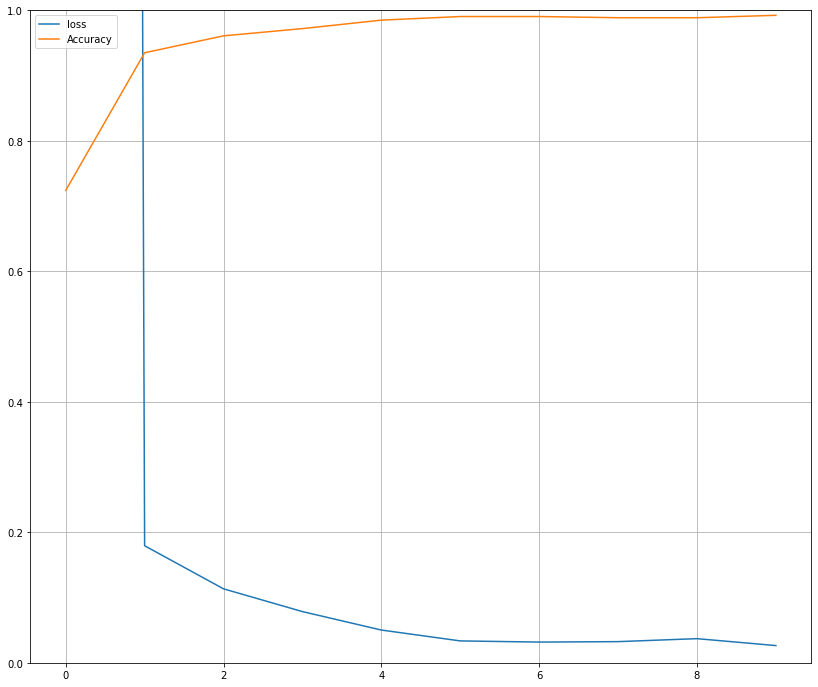

In [53]:
pd.DataFrame(hist.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)

In [54]:
CNN.evaluate(X_TEST,y_test)

5/5 [==============================] - 0s 57ms/step - loss: 0.1931 - Accuracy: 0.9632


[0.19308164715766907, 0.9632353186607361]